In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data sets
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols=["fLength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

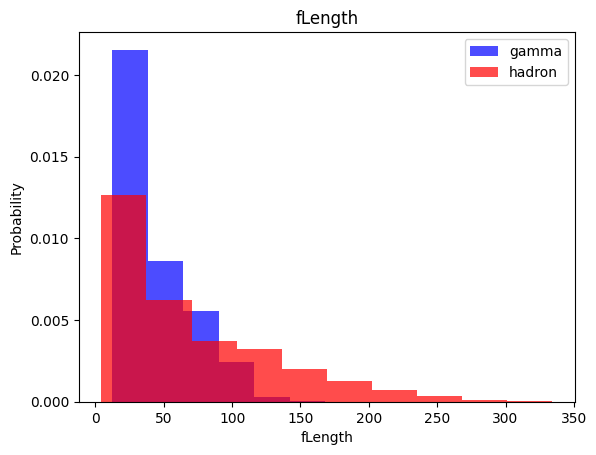

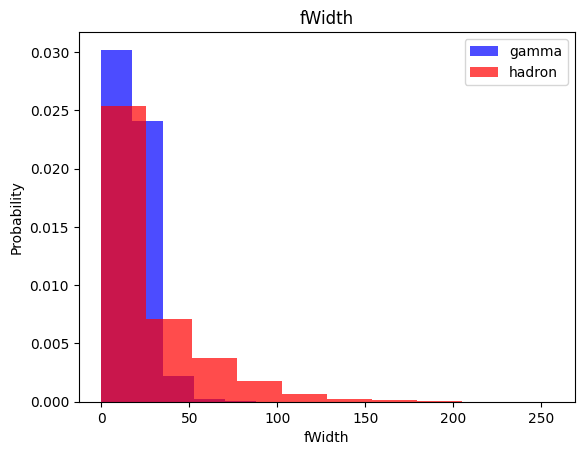

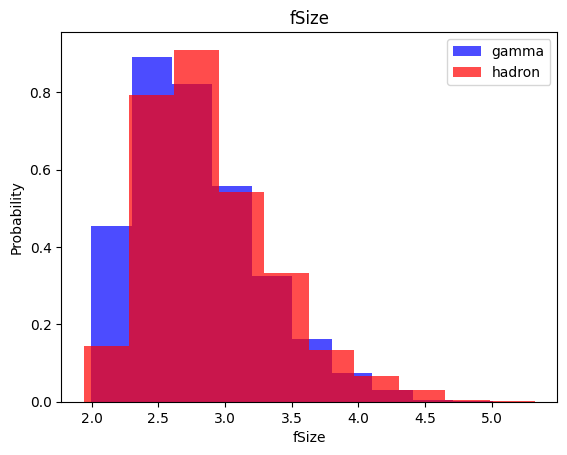

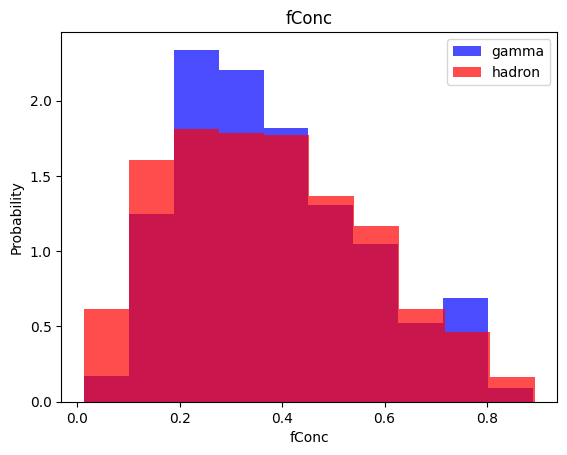

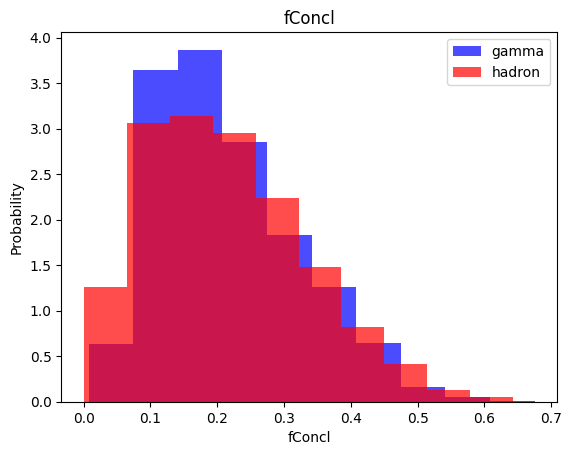

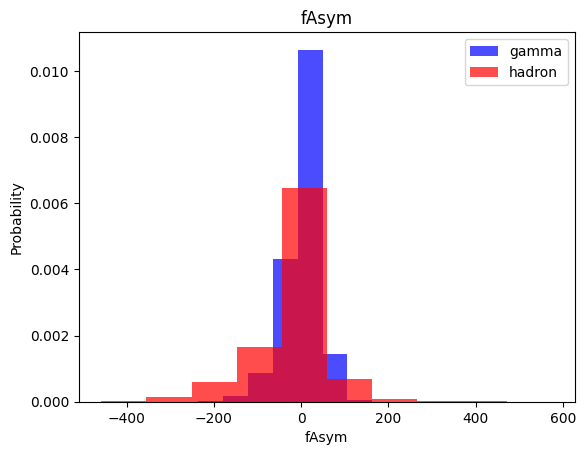

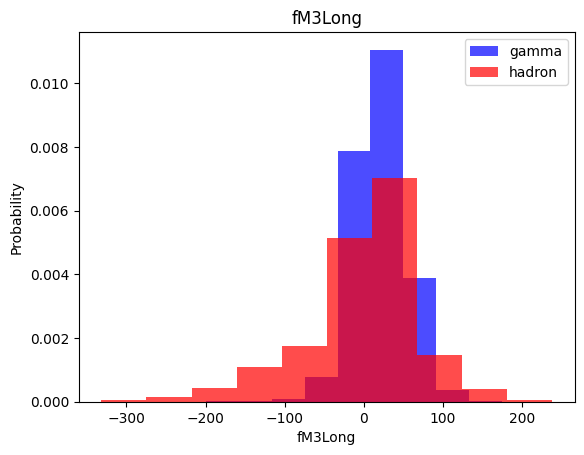

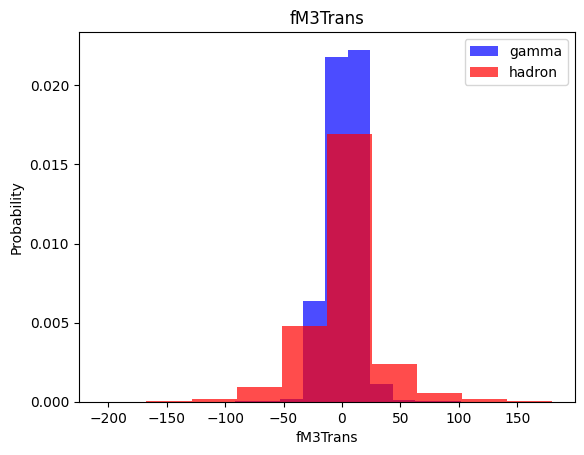

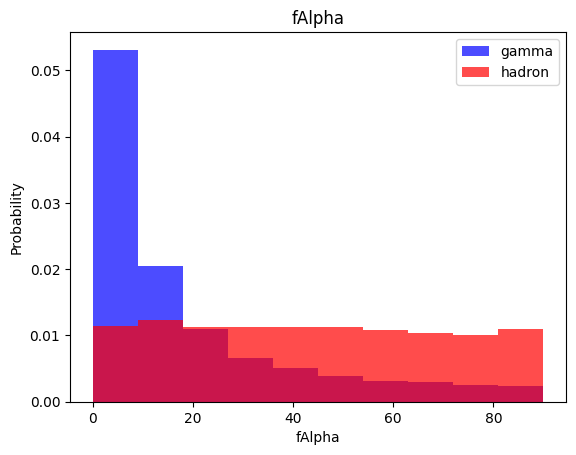

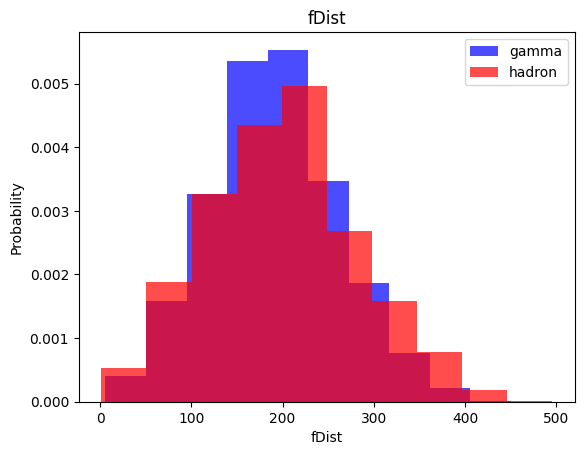

In [6]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label], color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets


In [7]:
train , valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data , x, y

In [ ]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron

7438
3974


In [9]:
train, x_train, y_train = scale_dataset(train,oversample=True)
valid, x_valid, y_valid = scale_dataset(valid,oversample=False)
test, x_test, y_test = scale_dataset(test,oversample=False)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1326
           1       0.86      0.86      0.86      2478

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1326
           1       0.74      0.90      0.81      2478

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



#logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1326
           1       0.84      0.82      0.83      2478

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1326
           1       0.89      0.90      0.89      2478

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label= 'loss')
  ax1.plot(history.history['val_loss'],label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label= 'accuracy')
  ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()
# def plot_accuracy(history):
#   plt.plot(history.history['accuracy'],label= 'accuracy')
#   plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(
    x_train,y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2 ,
    verbose = 0
  )

  return nn_model, history

16nodes, dropout0, lr0.1, batch size32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


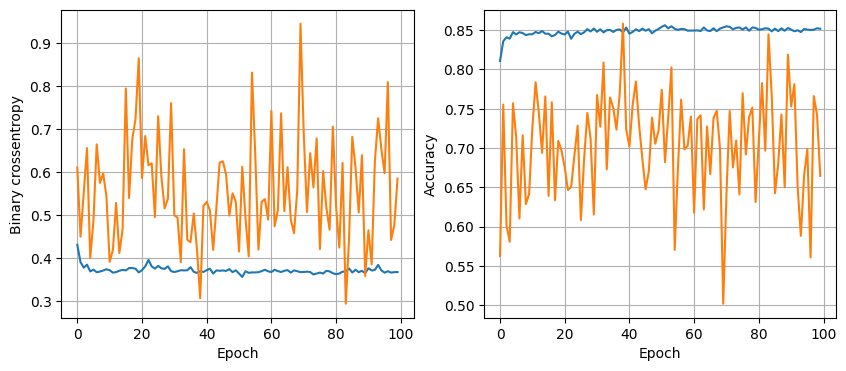

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.3764
16nodes, dropout0, lr0.1, batch size64


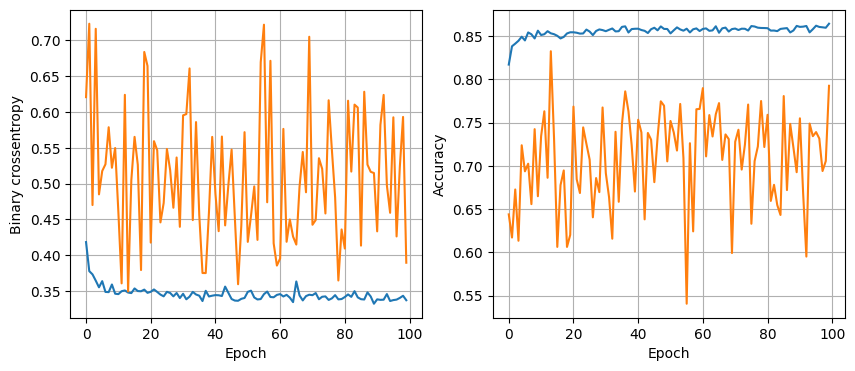

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8541 - loss: 0.3412
16nodes, dropout0, lr0.1, batch size128


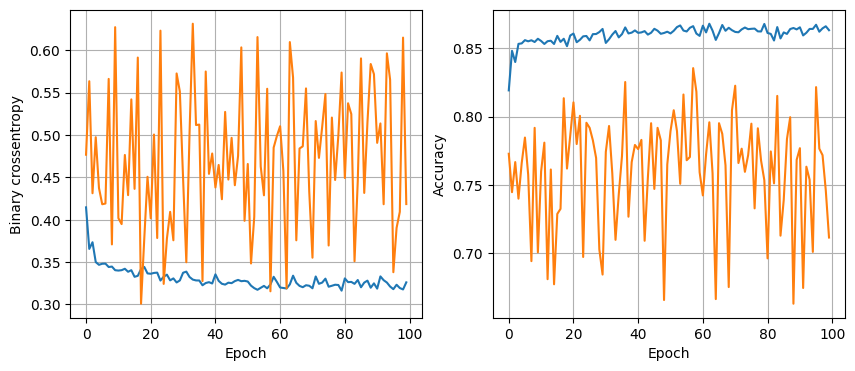

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8517 - loss: 0.3465
16nodes, dropout0, lr0.005, batch size32


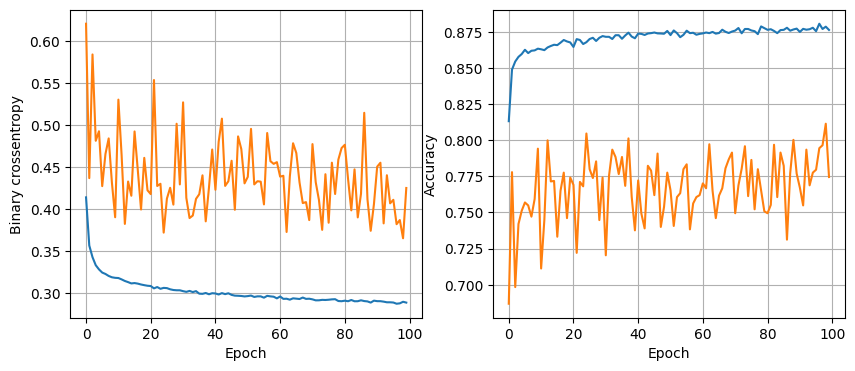

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3259
16nodes, dropout0, lr0.005, batch size64


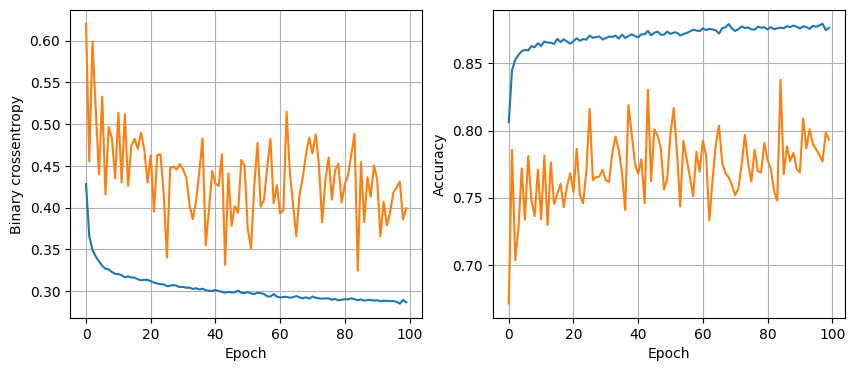

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3258
16nodes, dropout0, lr0.005, batch size128


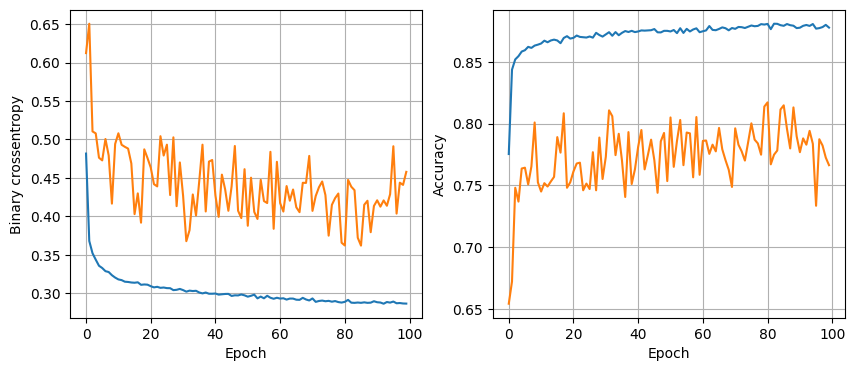

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.3244
16nodes, dropout0, lr0.001, batch size32


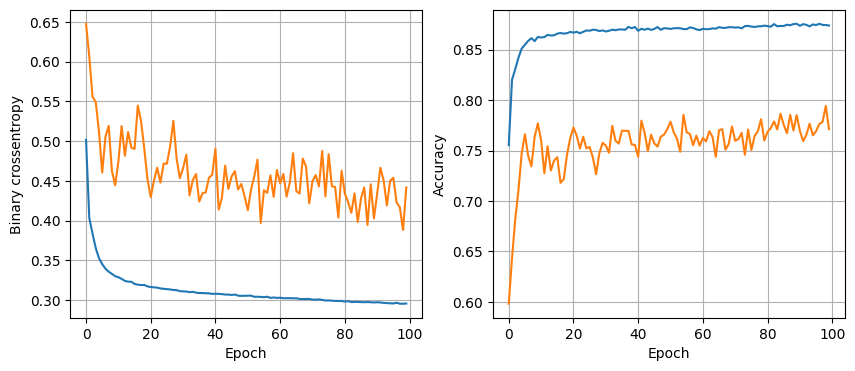

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3219
16nodes, dropout0, lr0.001, batch size64


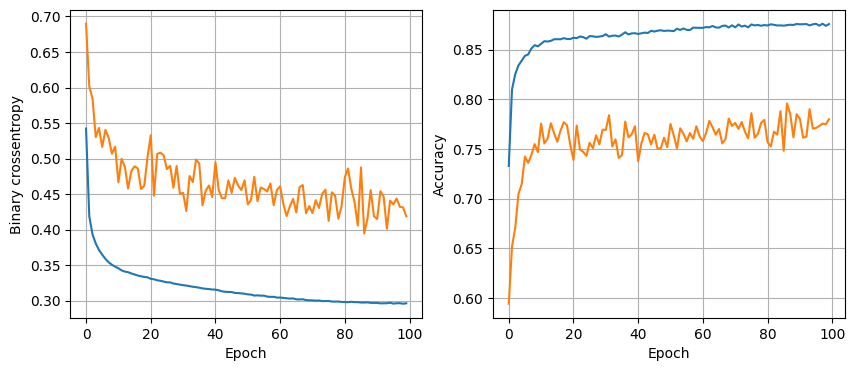

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3207
16nodes, dropout0, lr0.001, batch size128


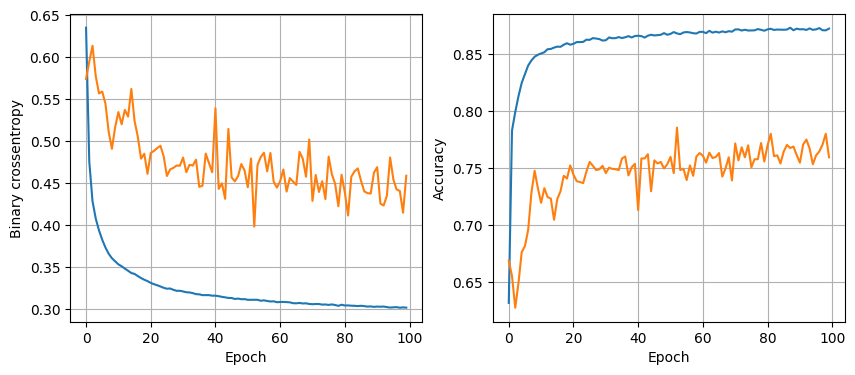

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3233
16nodes, dropout0.2, lr0.1, batch size32


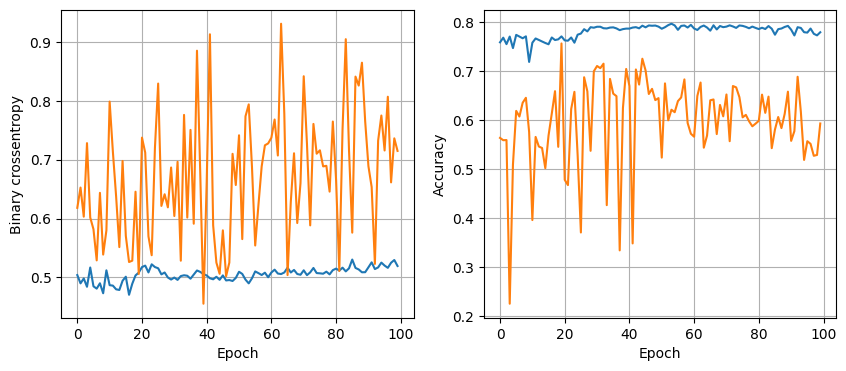

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.4923
16nodes, dropout0.2, lr0.1, batch size64


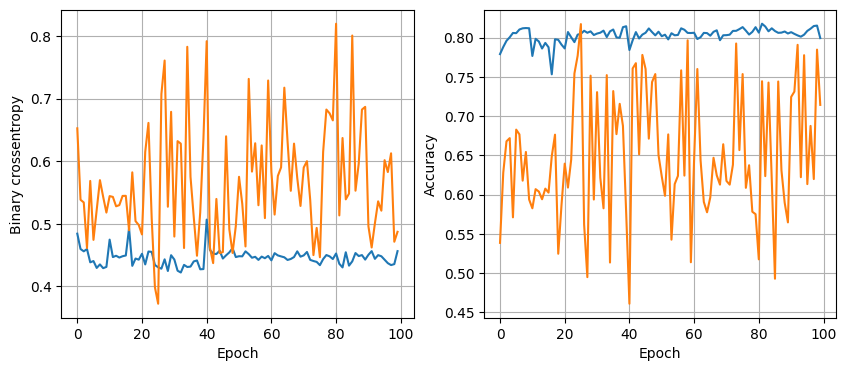

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.4195
16nodes, dropout0.2, lr0.1, batch size128


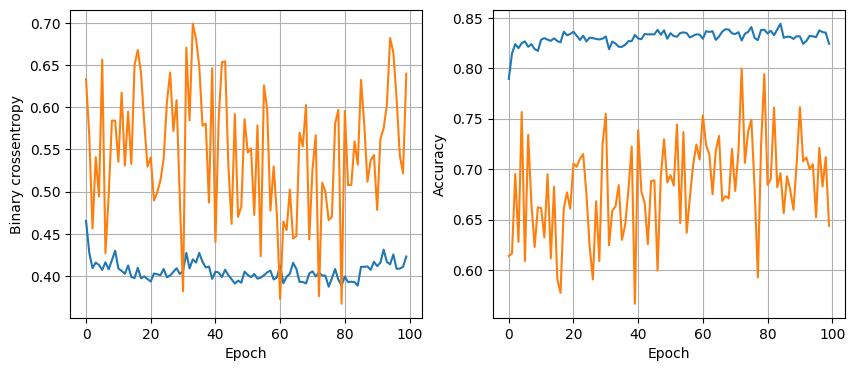

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3916
16nodes, dropout0.2, lr0.005, batch size32


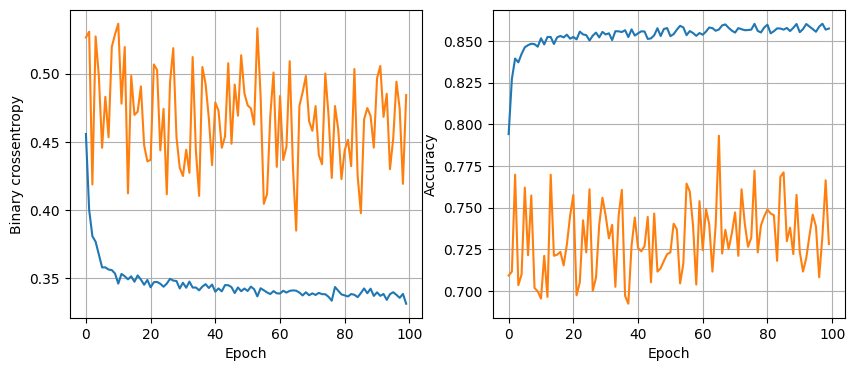

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3232
16nodes, dropout0.2, lr0.005, batch size64


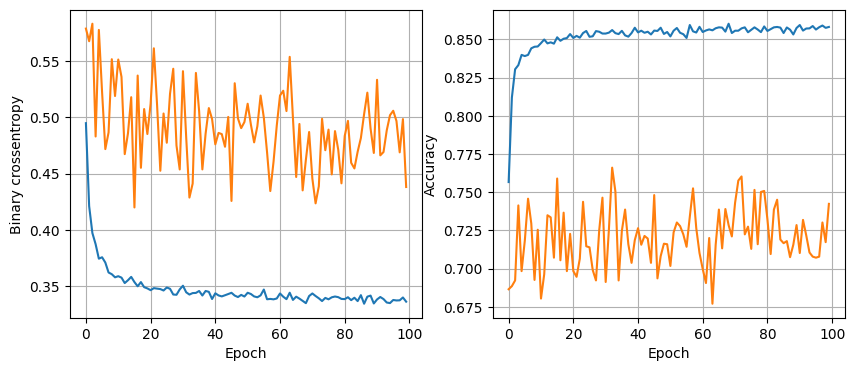

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3263
16nodes, dropout0.2, lr0.005, batch size128


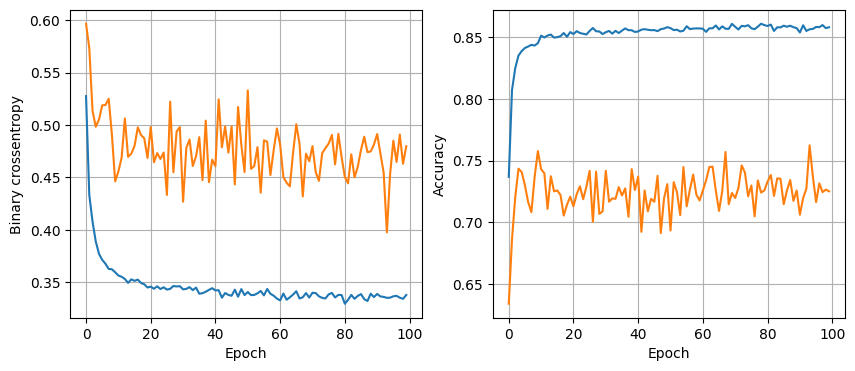

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3208
16nodes, dropout0.2, lr0.001, batch size32


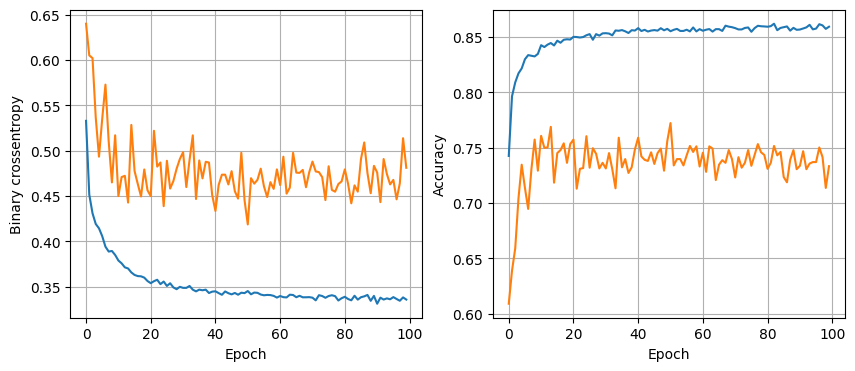

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.3222
16nodes, dropout0.2, lr0.001, batch size64


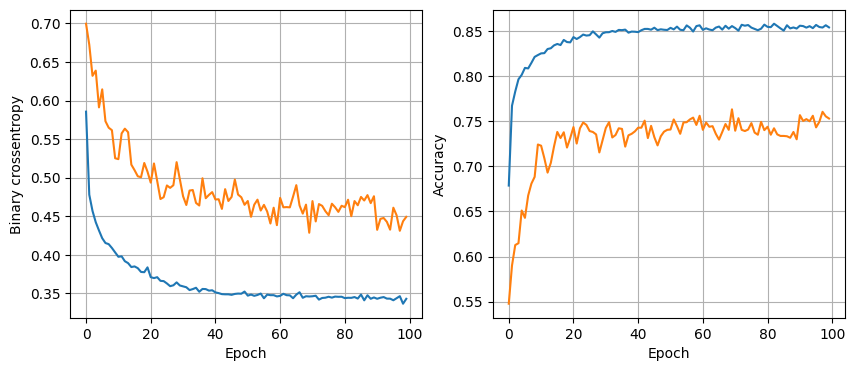

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3263
16nodes, dropout0.2, lr0.001, batch size128


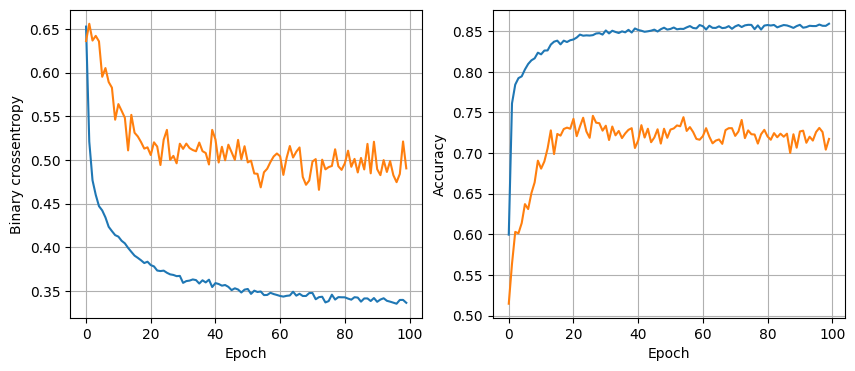

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3238
32nodes, dropout0, lr0.1, batch size32


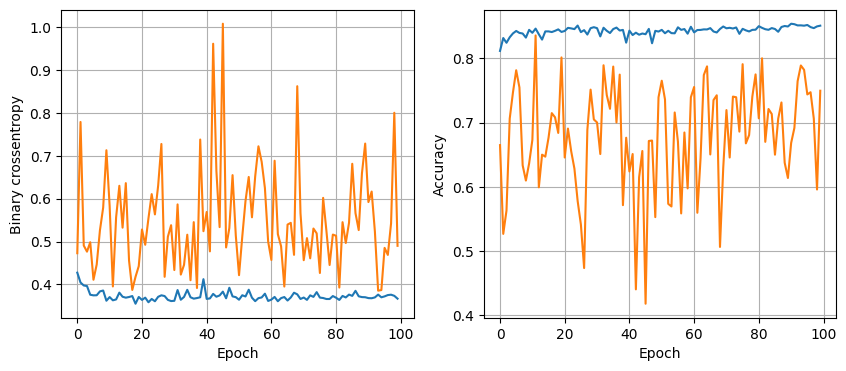

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8461 - loss: 0.3700
32nodes, dropout0, lr0.1, batch size64


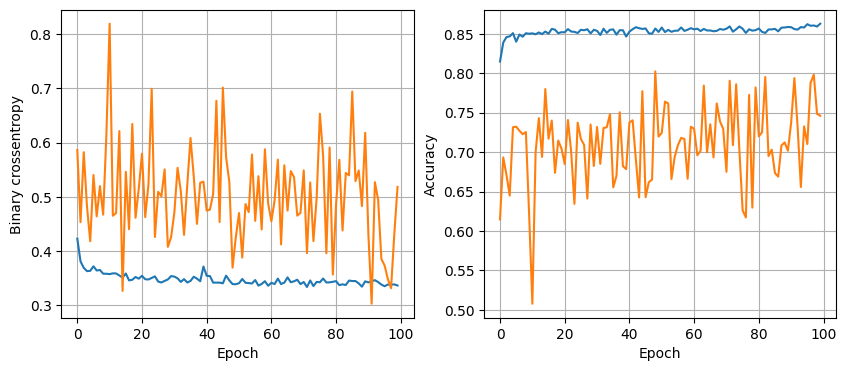

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3523
32nodes, dropout0, lr0.1, batch size128


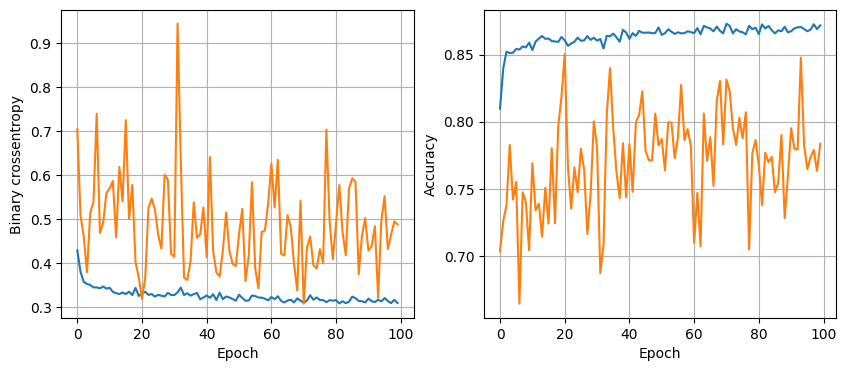

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3355
32nodes, dropout0, lr0.005, batch size32


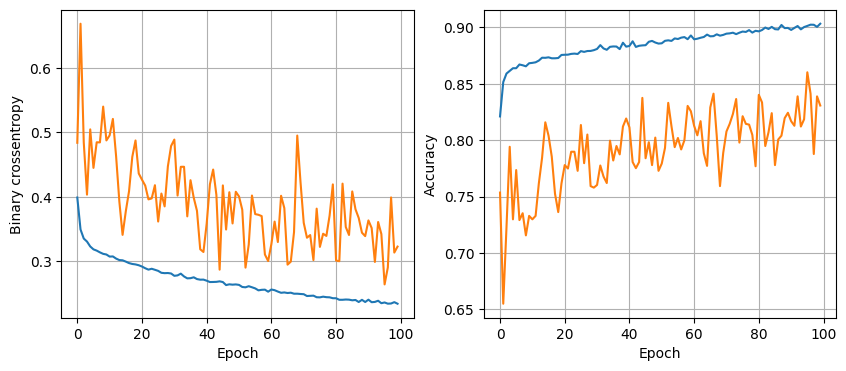

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3671
32nodes, dropout0, lr0.005, batch size64


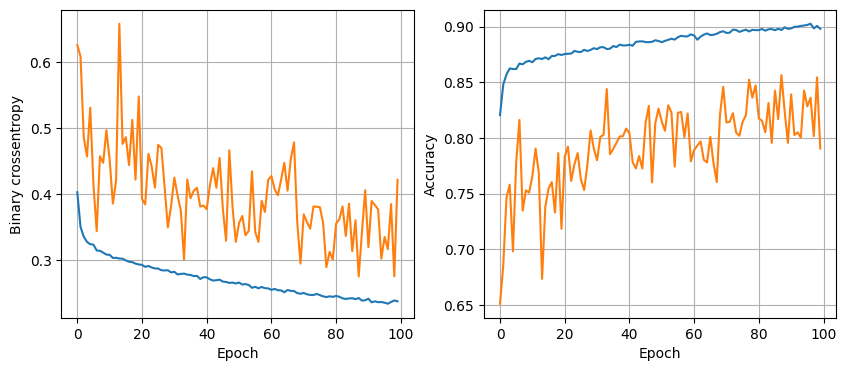

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3740
32nodes, dropout0, lr0.005, batch size128


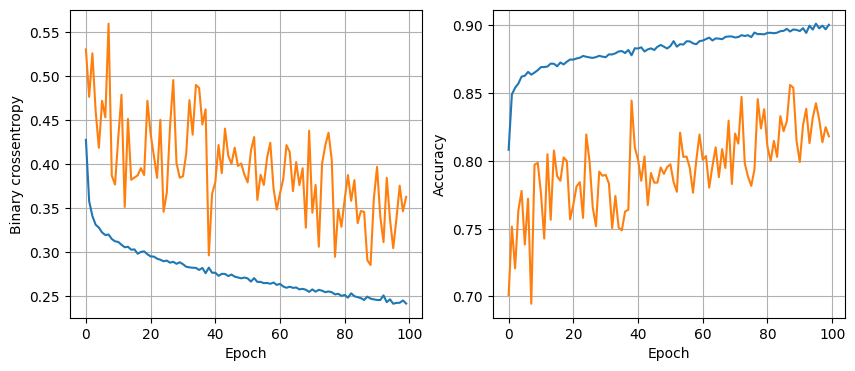

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3468
32nodes, dropout0, lr0.001, batch size32


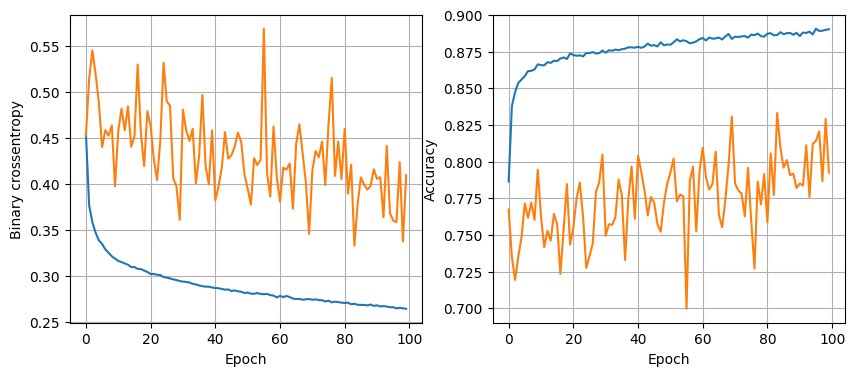

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3395
32nodes, dropout0, lr0.001, batch size64


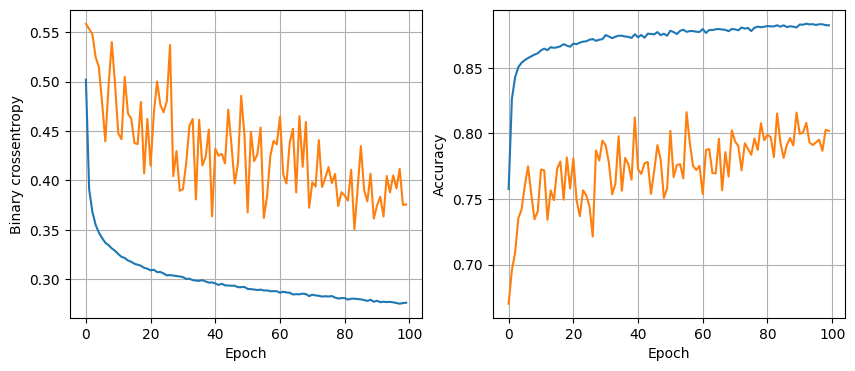

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3231
32nodes, dropout0, lr0.001, batch size128


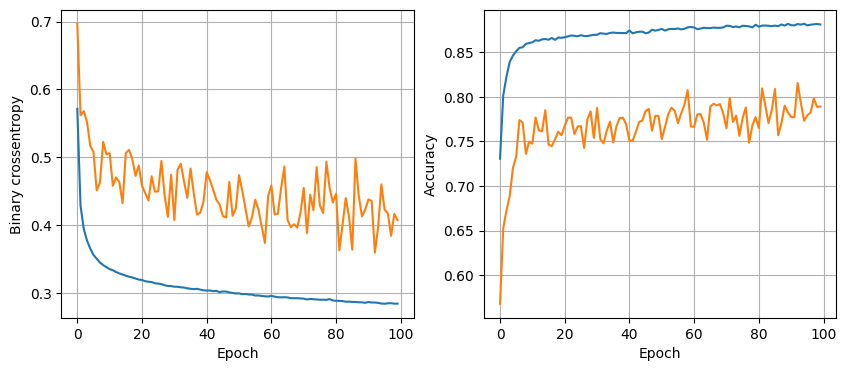

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3208
32nodes, dropout0.2, lr0.1, batch size32


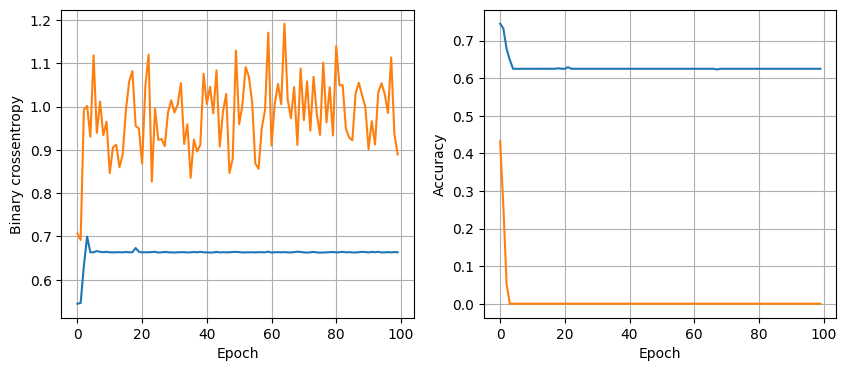

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.6594
32nodes, dropout0.2, lr0.1, batch size64


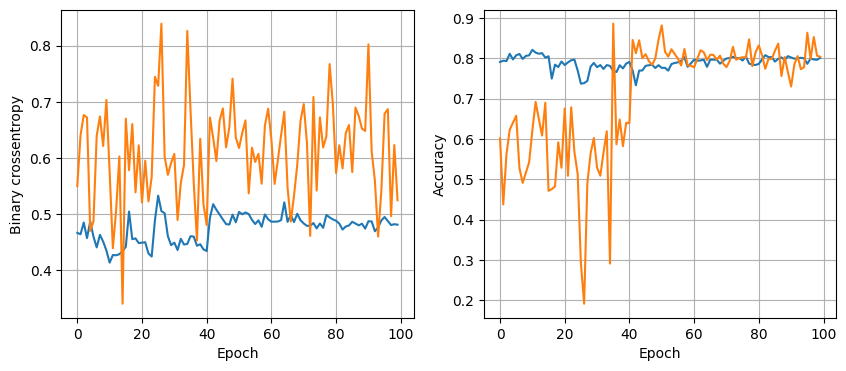

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8251 - loss: 0.4169
32nodes, dropout0.2, lr0.1, batch size128


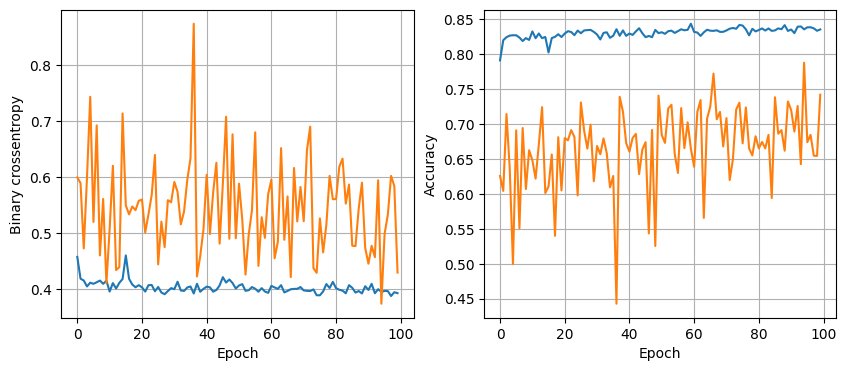

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3521
32nodes, dropout0.2, lr0.005, batch size32


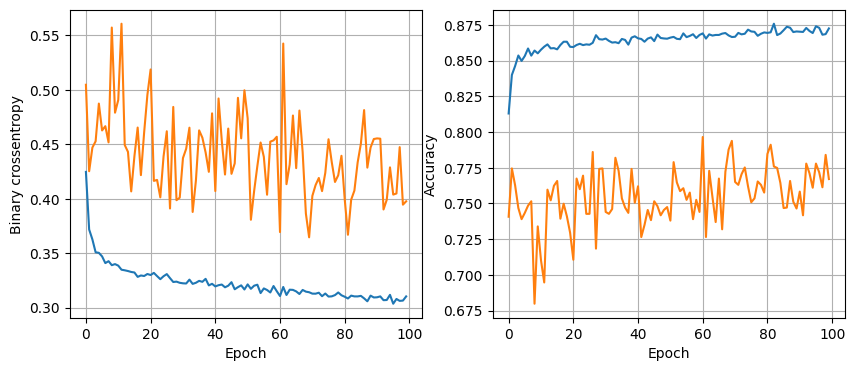

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3092
32nodes, dropout0.2, lr0.005, batch size64


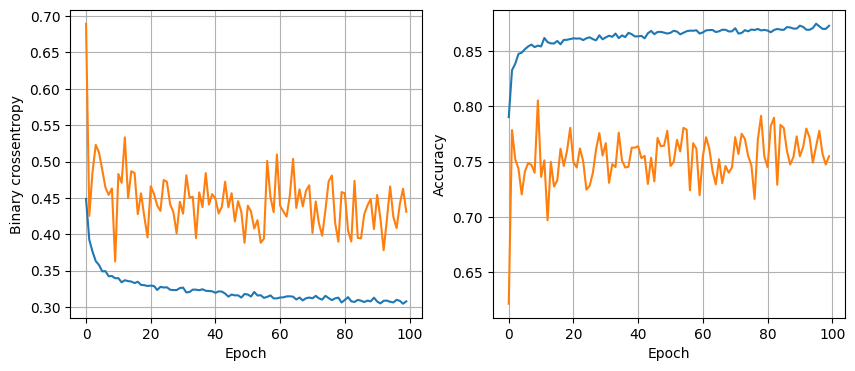

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3074
32nodes, dropout0.2, lr0.005, batch size128


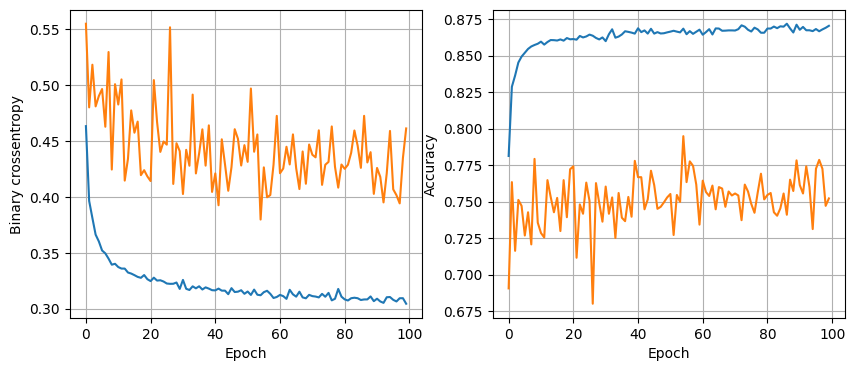

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3115
32nodes, dropout0.2, lr0.001, batch size32


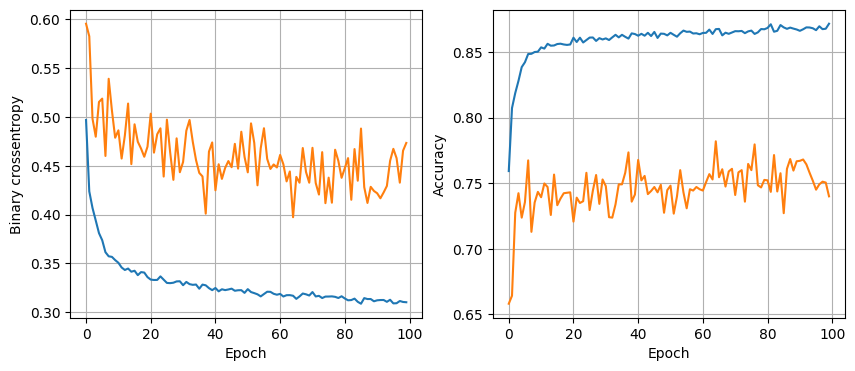

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3094
32nodes, dropout0.2, lr0.001, batch size64


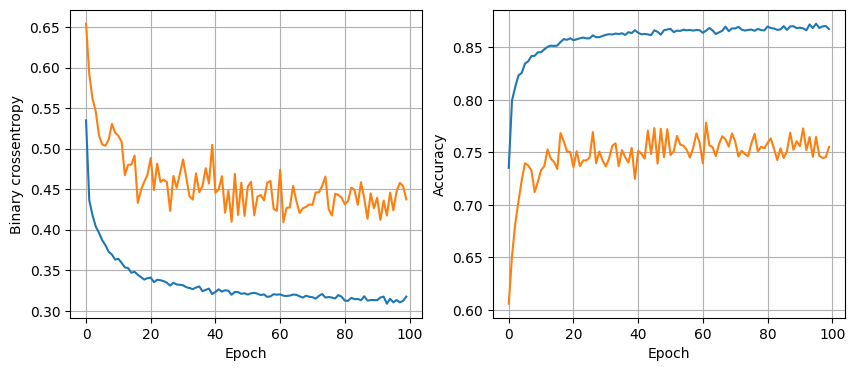

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3141
32nodes, dropout0.2, lr0.001, batch size128


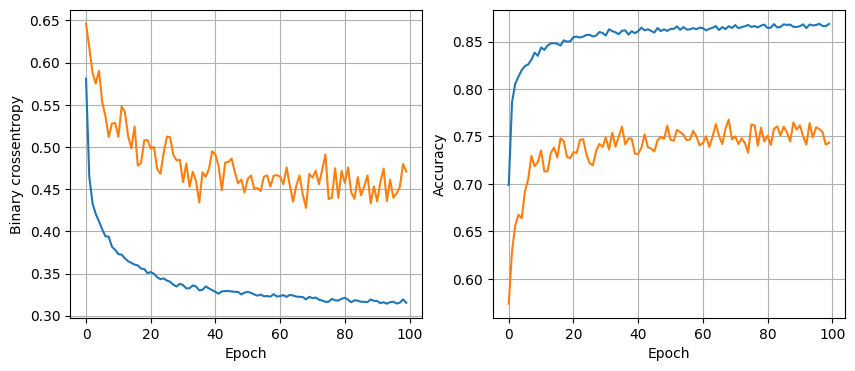

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3152
32nodes, dropout0, lr0.1, batch size32


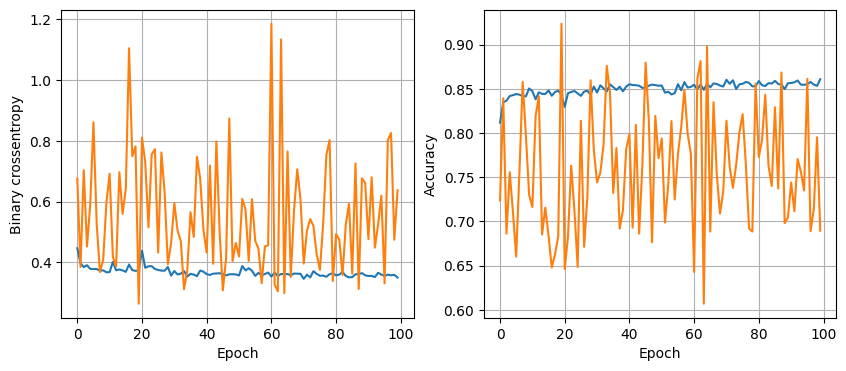

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3612
32nodes, dropout0, lr0.1, batch size64


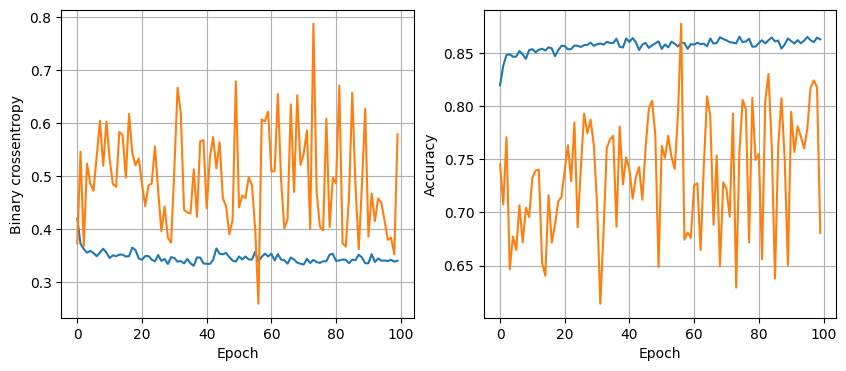

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3507
32nodes, dropout0, lr0.1, batch size128


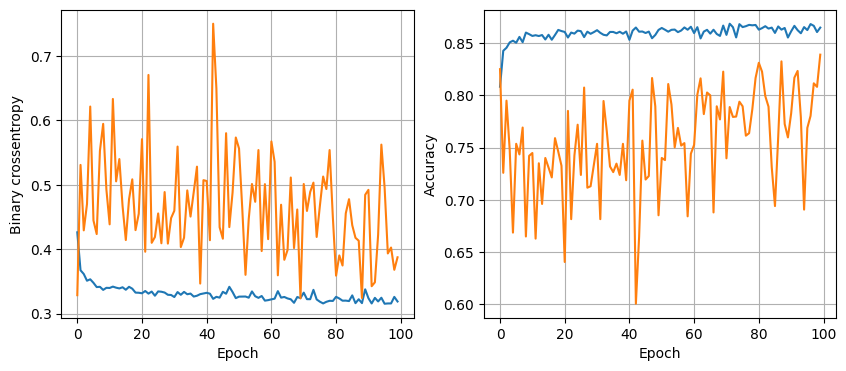

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.3471
32nodes, dropout0, lr0.005, batch size32


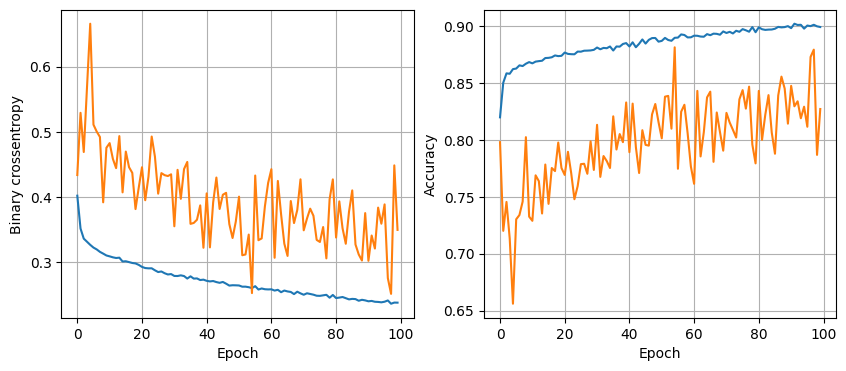

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3773
32nodes, dropout0, lr0.005, batch size64


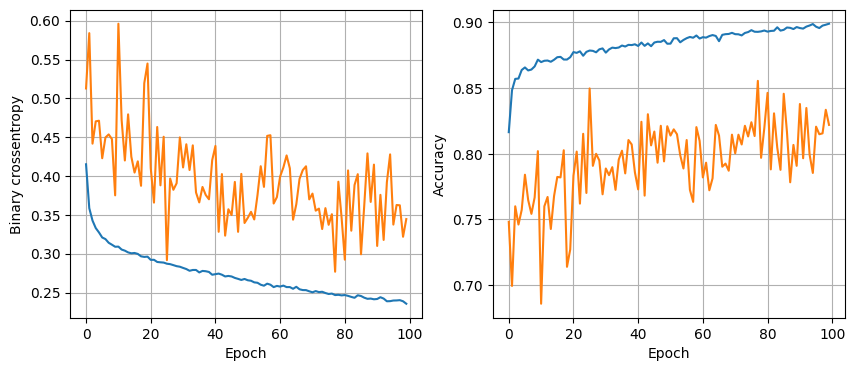

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3673
32nodes, dropout0, lr0.005, batch size128


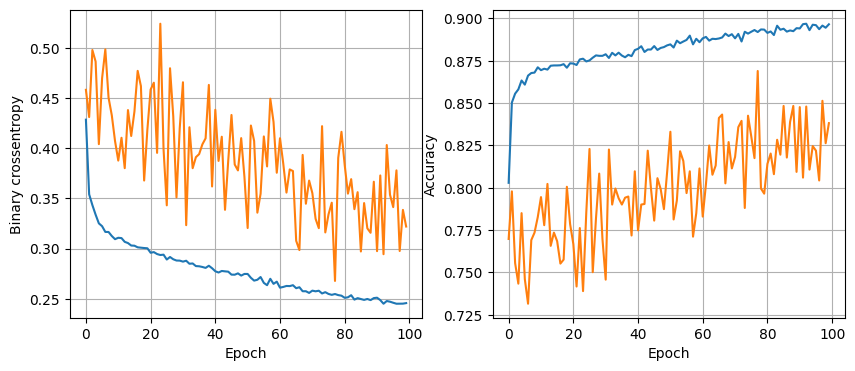

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3399
32nodes, dropout0, lr0.001, batch size32


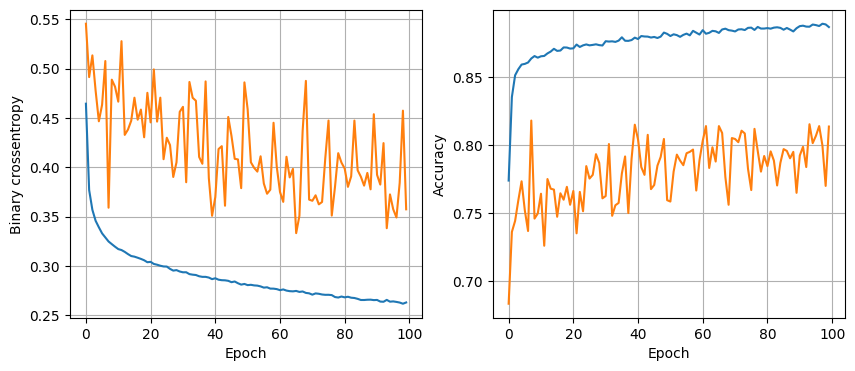

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3280
32nodes, dropout0, lr0.001, batch size64


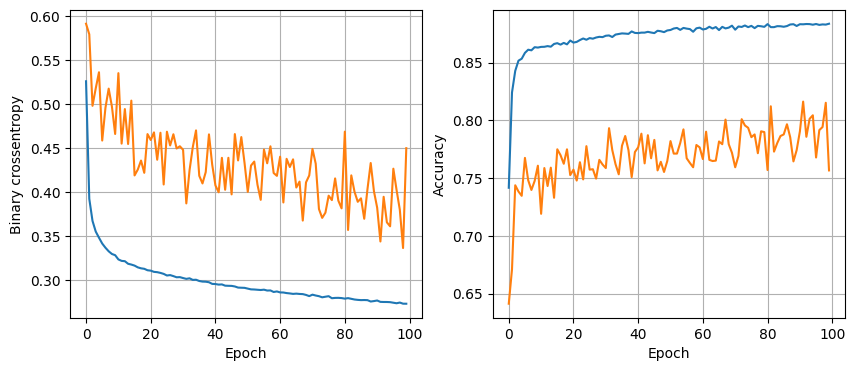

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3173
32nodes, dropout0, lr0.001, batch size128


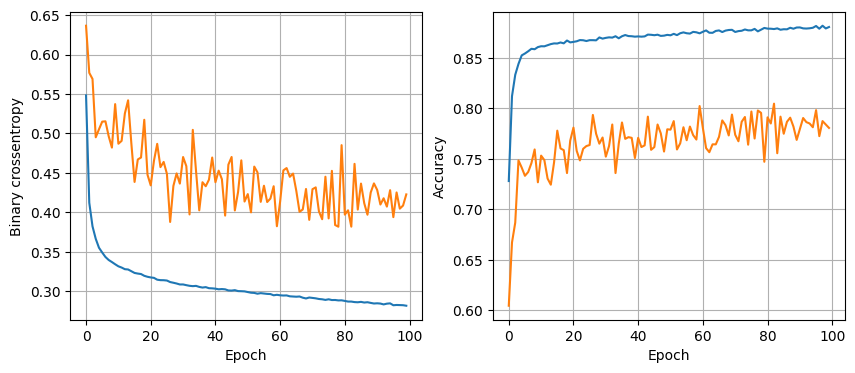

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3196
32nodes, dropout0.2, lr0.1, batch size32


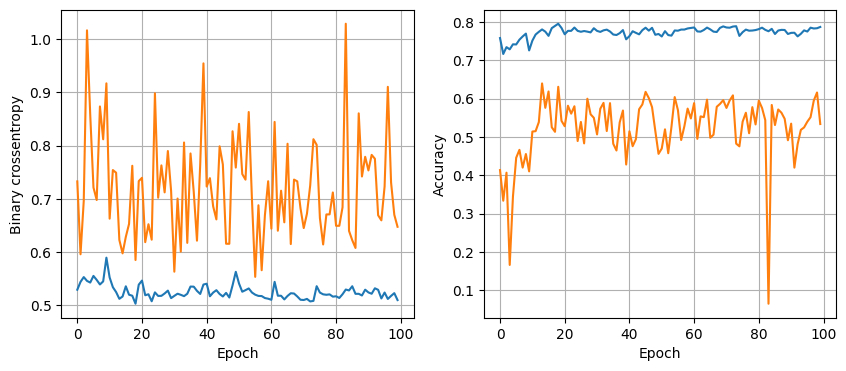

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4832
32nodes, dropout0.2, lr0.1, batch size64


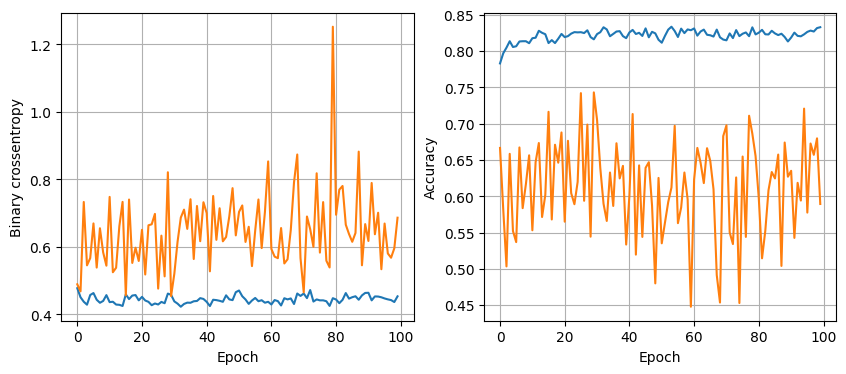

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.4104
32nodes, dropout0.2, lr0.1, batch size128


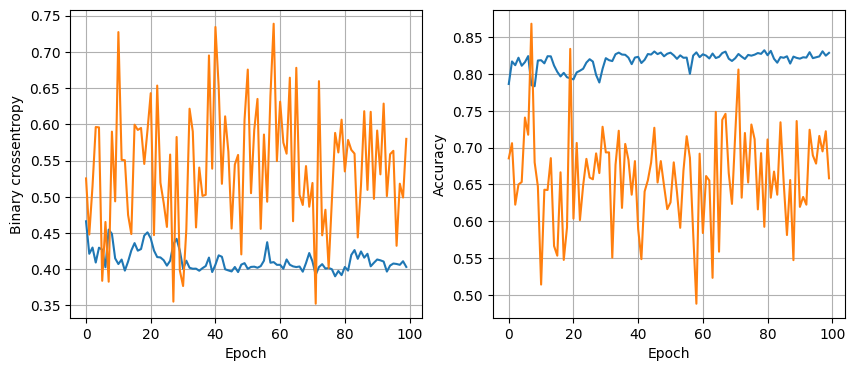

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3754
32nodes, dropout0.2, lr0.005, batch size32


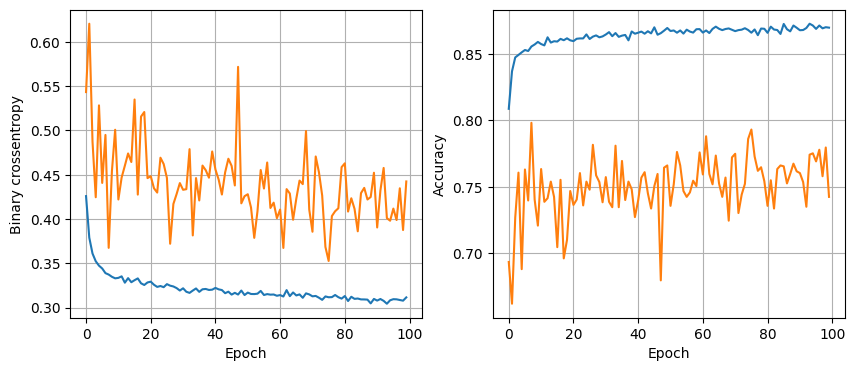

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3193
32nodes, dropout0.2, lr0.005, batch size64


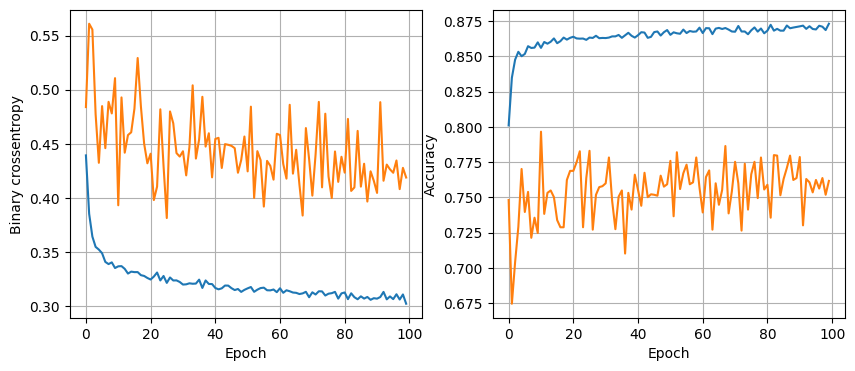

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3146
32nodes, dropout0.2, lr0.005, batch size128


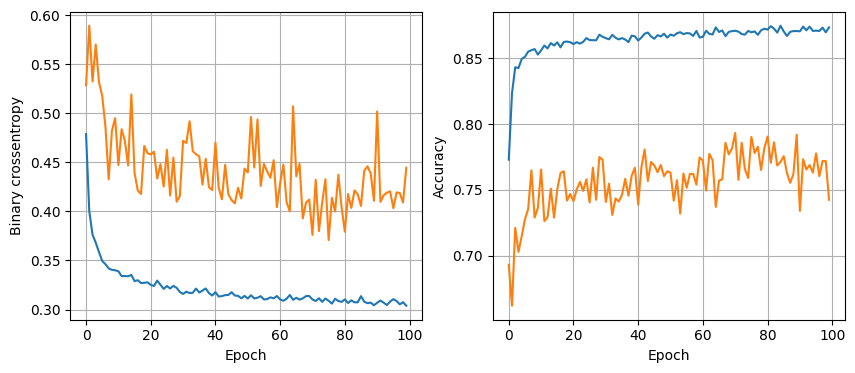

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3116
32nodes, dropout0.2, lr0.001, batch size32


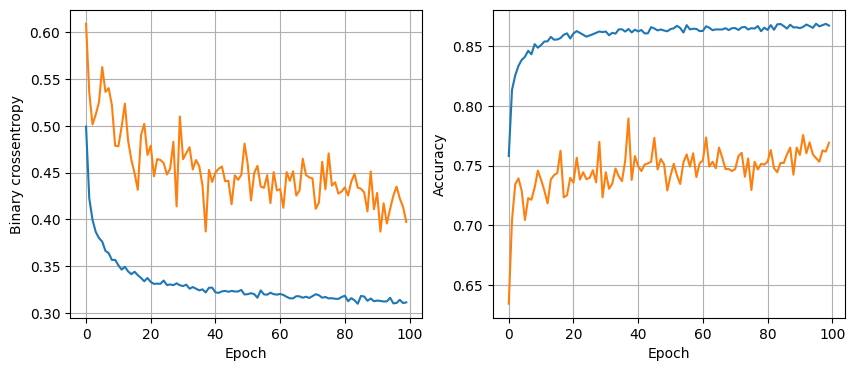

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.3115
32nodes, dropout0.2, lr0.001, batch size64


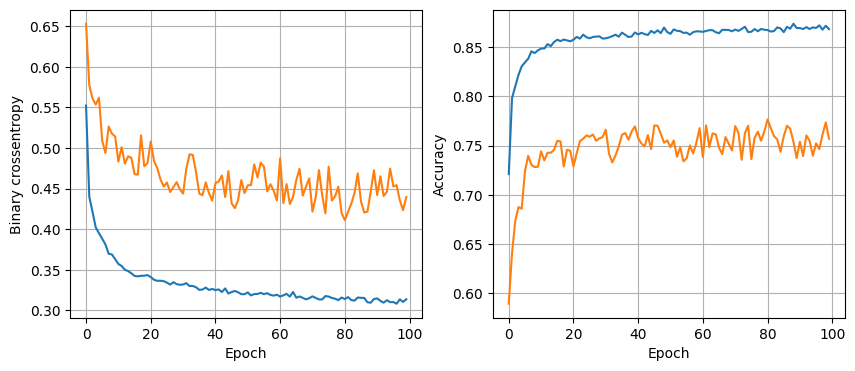

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3134
32nodes, dropout0.2, lr0.001, batch size128


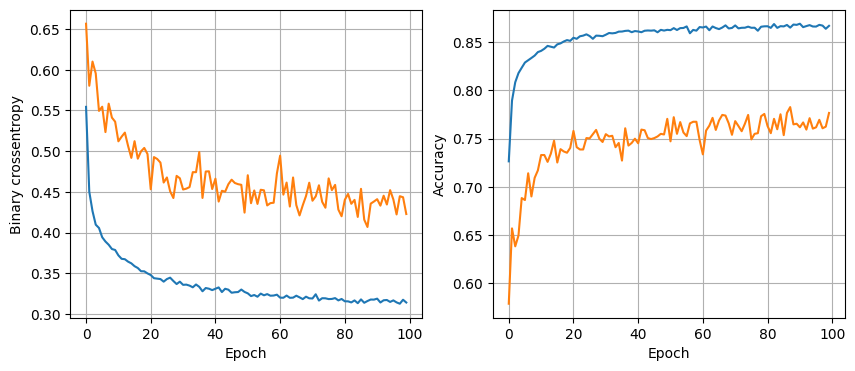

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3141


In [ ]:
least_val_loss = [float('inf'),float('inf')]
least_loss_model = None
epochs = 100
for num_nodes in [16,32,32]:
  for dropout_prob in [0,0.2]:
    for lr in[0.1,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes}nodes, dropout{dropout_prob}, lr{lr}, batch size{batch_size}")
        model,history = train_model(x_train, y_train, num_nodes,dropout_prob , lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid,y_valid)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred >0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test,y_pred))